In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation
import scipy.stats as st


import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc


**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [2]:

[X_train,y_train,S_train,X_test,y_test,S_test]=W2Rmisc.Get_n_Treat_MNIST_srt()

#for i in range(0,5):
#  W2Rmisc.show_MNIST_image(i,X_train,y_train,S_train)


**Training phase with or without the W2 regulatization.**

In [3]:

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print('Device is',DEVICE)

Device is cuda:0


In [4]:
EPOCHS_in = 2
BATCH_SIZE_in = 200



#without regularisation

lambdavar_almost_0=0.0000000001  #visualisation of the evolution of W2 during the gradient descent will be impossible if lambdavar = 0

model_no_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - without reg')
Lists_Results_noreg=W2Rcore.W2R_fit(model_no_reg,X_train,y_train, S_train, lambdavar_almost_0, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

#with regularisation

lambdavar=0.00001

model_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - with reg')
Lists_Results_reg=W2Rcore.W2R_fit(model_reg,X_train,y_train, S_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)



Run training - without reg
epoch 0 -- batchNb 1: 0.24510692059993744 tensor(6.4506e-14, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 2: 0.24933390319347382 tensor(5.9038e-14, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 3: 0.2444237470626831 tensor(1.6737e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 4: 0.22627253830432892 tensor(1.5423e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 5: 0.22912274301052094 tensor(3.4880e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 6: 0.2288433015346527 tensor(3.3803e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 7: 0.21849995851516724 tensor(2.7194e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 8: 0.21569965779781342 tensor(1.1956e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 9: 0.19795545935630798 tensor(3.4666e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 10

epoch 0 -- batchNb 78: 0.0783982202410698 tensor(5.2766e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 79: 0.05482826754450798 tensor(2.4593e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 80: 0.0687740221619606 tensor(1.6482e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 81: 0.08753079175949097 tensor(5.3298e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 82: 0.0931103527545929 tensor(9.2698e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 83: 0.05319676920771599 tensor(1.6706e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 84: 0.10032784193754196 tensor(1.8035e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 85: 0.08594366908073425 tensor(3.0783e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 86: 0.06881088018417358 tensor(3.5902e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 87: 0.072628438472747

epoch 0 -- batchNb 155: 0.0584283247590065 tensor(9.5332e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 156: 0.041897669434547424 tensor(2.1709e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 157: 0.06485383957624435 tensor(2.0770e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 158: 0.0577489398419857 tensor(2.4601e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 159: 0.05018406733870506 tensor(1.3329e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 160: 0.04311106726527214 tensor(2.3300e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 161: 0.063045434653759 tensor(1.0125e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 162: 0.062491148710250854 tensor(3.2351e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 163: 0.04427405819296837 tensor(2.6444e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 164: 0.0250

epoch 0 -- batchNb 231: 0.053113386034965515 tensor(4.1815e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 232: 0.04400762543082237 tensor(9.1262e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 233: 0.03837382793426514 tensor(3.6761e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 234: 0.04175146296620369 tensor(1.0450e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 235: 0.05730164796113968 tensor(3.7677e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 236: 0.04363587871193886 tensor(4.1328e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 237: 0.040371399372816086 tensor(8.7442e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 238: 0.05596195161342621 tensor(4.0030e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 239: 0.03767922893166542 tensor(9.7193e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 240: 0.

epoch 1 -- batchNb 8: 0.03476578742265701 tensor(3.8114e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 9: 0.032942239195108414 tensor(1.3544e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 10: 0.03398067131638527 tensor(4.9798e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 11: 0.0281923059374094 tensor(1.3597e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 12: 0.03630639985203743 tensor(3.9431e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 13: 0.019931739196181297 tensor(1.8950e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 14: 0.027427703142166138 tensor(8.8354e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 15: 0.02971302904188633 tensor(2.3146e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 16: 0.014307170175015926 tensor(6.0476e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 17: 0.02587208896

epoch 1 -- batchNb 85: 0.03541838750243187 tensor(3.9041e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 86: 0.025645185261964798 tensor(6.4698e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 87: 0.03855885937809944 tensor(2.6569e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 88: 0.021380381658673286 tensor(3.6200e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 89: 0.026420673355460167 tensor(4.2246e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 90: 0.021992169320583344 tensor(6.7943e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 91: 0.03674503043293953 tensor(1.3289e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 92: 0.023768598213791847 tensor(1.1663e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 93: 0.03209694102406502 tensor(1.7035e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 94: 0.0267357

epoch 0 -- batchNb 12: 0.18221458792686462 tensor(3.2696e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 13: 0.18839211761951447 tensor(5.4931e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 14: 0.19268281757831573 tensor(4.5021e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 15: 0.17178170382976532 tensor(4.3793e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 16: 0.145875945687294 tensor(7.0799e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 17: 0.1456776112318039 tensor(5.3207e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 18: 0.14566828310489655 tensor(4.4077e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 19: 0.14944866299629211 tensor(2.7767e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 20: 0.14304102957248688 tensor(4.3476e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 21: 0.138442307710647

epoch 0 -- batchNb 89: 0.10217297077178955 tensor(2.7214e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 90: 0.06835832446813583 tensor(7.8920e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 91: 0.08218399435281754 tensor(1.2397e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 92: 0.10193823277950287 tensor(1.4851e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 93: 0.09265220165252686 tensor(1.7777e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 94: 0.0766267403960228 tensor(1.3594e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 95: 0.07327017933130264 tensor(1.0933e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 96: 0.07295436412096024 tensor(9.7788e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 97: 0.09466510266065598 tensor(4.0285e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 98: 0.0987934246659

epoch 0 -- batchNb 166: 0.06166999787092209 tensor(5.8582e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 167: 0.07034163922071457 tensor(1.6788e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 168: 0.08516564220190048 tensor(2.5981e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 169: 0.0625491812825203 tensor(4.3817e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 170: 0.05030583217740059 tensor(4.6706e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 171: 0.0831226035952568 tensor(1.7704e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 172: 0.08475341647863388 tensor(1.8053e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 173: 0.08390919119119644 tensor(2.4767e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 174: 0.07697289437055588 tensor(4.2152e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 175: 0.0738

epoch 0 -- batchNb 242: 0.07499263435602188 tensor(2.6021e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 243: 0.05788483843207359 tensor(1.0219e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 244: 0.05088353157043457 tensor(1.3205e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 245: 0.06573005765676498 tensor(1.6226e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 246: 0.06116601079702377 tensor(1.0524e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 247: 0.06614325940608978 tensor(2.7214e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 248: 0.06541020423173904 tensor(7.9733e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 249: 0.0703461617231369 tensor(3.3716e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 250: 0.05096767470240593 tensor(4.6883e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 251: 0.086

epoch 1 -- batchNb 20: 0.061719246208667755 tensor(4.9652e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 21: 0.05991499498486519 tensor(2.0742e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 22: 0.07469038665294647 tensor(5.9891e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 23: 0.060415420681238174 tensor(1.6303e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 24: 0.05569954961538315 tensor(3.1638e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 25: 0.06344986706972122 tensor(1.2420e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 26: 0.06276310235261917 tensor(7.1686e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 27: 0.06943333148956299 tensor(2.7078e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 28: 0.06757022440433502 tensor(6.4744e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 29: 0.0661490261

epoch 1 -- batchNb 97: 0.06821908801794052 tensor(8.0220e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 98: 0.07359008491039276 tensor(1.8703e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 99: 0.07435590773820877 tensor(1.9277e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 100: 0.07834875583648682 tensor(1.9132e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 101: 0.09249148517847061 tensor(2.5808e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 102: 0.07738940417766571 tensor(3.6832e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 103: 0.08540579676628113 tensor(2.3739e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 104: 0.07815421372652054 tensor(8.1467e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 105: 0.07149722427129745 tensor(1.3980e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 106: 0.06321

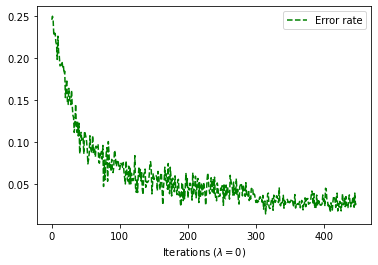

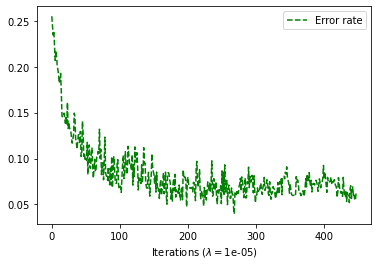

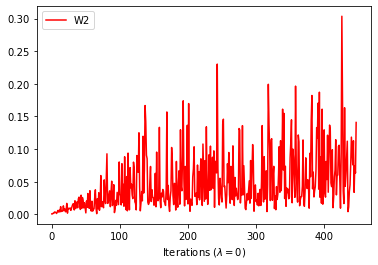

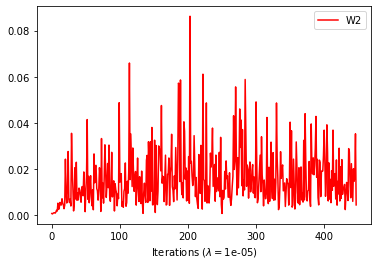

In [8]:
plt.figure()
plt.plot(Lists_Results_noreg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.savefig('Convergence_attach_noreg.pdf')


plt.figure()
plt.plot(Lists_Results_reg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_attach_'+str(lambdavar)+'.pdf')


plt.figure()
plt.plot(np.array(Lists_Results_noreg['W2'])/lambdavar_almost_0,'r-',label='W2')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.savefig('Convergence_regul_noreg.pdf')

plt.figure()
plt.plot(np.array(Lists_Results_reg['W2'])/lambdavar,'r-',label='W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_regul_'+str(lambdavar)+'.pdf')



**Tests - without regularisation**

In [9]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0423)
DI: 0.8280931736082737
s0_RatioGoodPred: 0.8790208375480477
s1_RatioGoodPred: 0.9746885505240261


**Tests - with regularisation**

In [10]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0704)
DI: 0.9375702340563888
s0_RatioGoodPred: 0.8749747117135342
s1_RatioGoodPred: 0.9333596994265375
